In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt

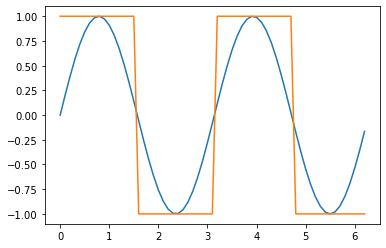

In [81]:
# training sets

# x vector 
step_size = 0.1
x = np.arange(0,2*np.pi,step_size)

# sine wave
ys = np.sin(2*x)
plt.plot(x,ys)

# square wave
ysq = [1 if a >=0 else -1 for a in ys]
plt.plot(x,ysq)

#Testing sets
xtest = np.arange(0.05,2*np.pi,step_size)
sintest = np.sin(2*xtest)
squaretest = [1 if a>=0 else -1 for a in sintest]

In [82]:
def gauss(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))

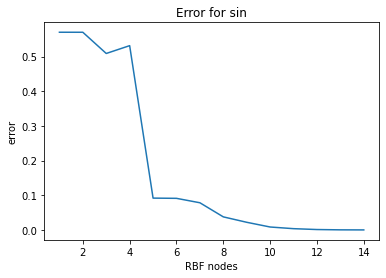

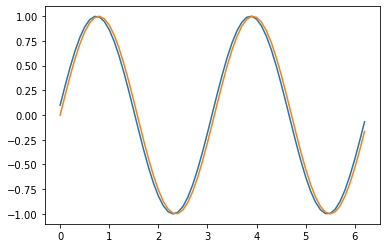

In [83]:
# 3.1.1 Try to vary the number of units to obtain the...

nRbfNodes = 15 # max number of units
n = len(x)
errors =[]
sigma = 1
f_hat = np.zeros((n,nRbfNodes))


# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ys)
    W = np.linalg.solve(a,b)

    error = np.mean(abs(np.dot(phis_test,W)-sintest)) 
    errors.append(error)
    f_hat[:,j] = np.dot(phis_test,W)

errors = np.array(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for sin')

# first error below 0.1 is 5 units
# first error below 0.01 is 10 units
# first error below 0.001 is 13 units
plt.figure()
plt.plot(x,f_hat[:,13], x,ys)

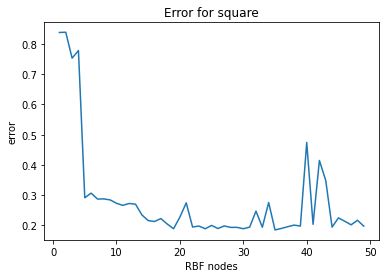

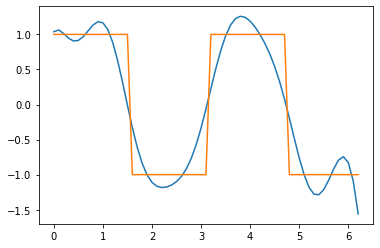

In [84]:
# 3.1.1 SAME BUT FOR SQUARE

nRbfNodes = 50 # max number of units
n = len(x)
errors = []
sigma = 1
f_hat = np.zeros((n,nRbfNodes))

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ysq)
    W = np.linalg.solve(a,b)

    error = np.mean(abs(np.dot(phis_test,W)-squaretest)) 
    errors.append(error)
    f_hat[:,j] = np.dot(phis_test,W)

errors = np.array(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for square')

# error is never below 0.1 

plt.figure()
plt.plot(x,f_hat[:,13], x,ysq)



Text(0.5, 1.0, 'Error for square')

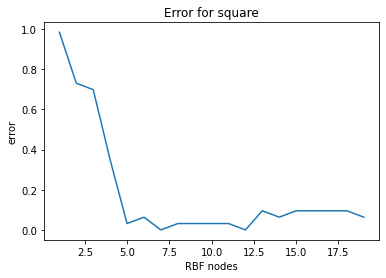

In [85]:
##3.1.2 How can you simply transform the output....

#Ans: Move the values that are inbetween -1 and 1 towards 
#the closest value

nRbfNodes = 20 # max number of units
n = len(x)
errors =[]
sigma = 1

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ysq)
    W = np.linalg.solve(a,b)
    
    # new for this part. makes error to zero
    C = np.dot(phis_test,W)
    C = [1 if C[i] >=0 else -1 for i in range(len(C))] 
    C = np.array(C)
    
    error = np.mean(abs(C-squaretest)) 
    errors.append(error)
    
errors = np.array(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for square')

# error is 0 after 7 units


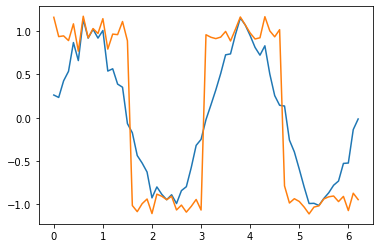

In [86]:
np.random.seed(1)
noise = np.random.normal(0,.1,len(ys))
ys_noise = np.add(ys,noise)
ysq_noise = np.add(ysq,noise)

ys_test_noise = np.add(sintest,noise)
ysq_test_noise = np.add(squaretest,noise)

# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise

plt.plot(x,ys_test_noise)
plt.plot(x,ysq_test_noise)


Text(0, 0.5, 'Error')

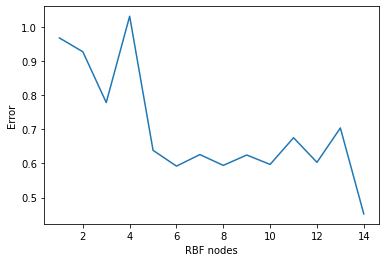

In [87]:
#3.2.1 On-line learning delta rule

eta = .1
diff = []
n = len(x)
nRbfNodes = 15
#Y_noise = ys_noise
Y_noise = ysq_noise

W_save = np.zeros((nRbfNodes-1,nRbfNodes-1))
approx_save = np.zeros((n,nRbfNodes))

for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    W = np.random.normal(0,1,j)
    
    mu = [i/j*2*np.pi for i in range(j)]
    sigma = 2*np.pi/nRbfNodes
    
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[idx,i] = gauss(xtest[idx],mu[i],sigma)
        error = Y_noise[idx]-np.dot(phis,W)
        delta_w = np.dot(eta*error,phis)  
        W = delta_w+W
    W_save[j-1,:j] = W
    
    approx = np.mean(abs(np.dot(phis_test,W)-Y_noise))
    approx_save[:,j] = np.dot(phis_test,W)
    diff.append(approx)

diff = np.array(diff)
plt.plot(range(1,nRbfNodes),diff)
plt.xlabel('RBF nodes')
plt.ylabel('Error')
#plt.title('Error for sin(2x) with noise')

#plt.plot(x,ys_prox)

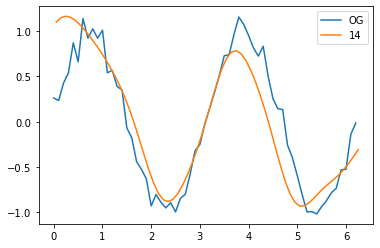

In [88]:
plt.plot(x,ys_test_noise)

plt.plot(xtest,approx_save[:,14])
plt.legend(['OG','14'])

In [89]:
eta = .1
diff = []
nRbfNodes = 2
for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros(j)
    delta_w = []
    W = np.ones(j)
    mu = [i/j*2*np.pi for i in range(j)]
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[i] = gauss(xtest[idx],mu[i],sigma)
            error = ys_noise[idx]-np.dot(phis[i],W)
        delta_w=(eta*error*phis[i])
        W = delta_w+W 
        
    #f_hat is an approximation of the desired function
    f_hat = np.sum(phis_test*W)
    approx = np.mean(abs(ys_noise-f_hat))
    diff.append(approx)

diff = np.array(diff)
#plt.plot(range(1,nRbfNodes),diff)
#plt.xlabel('RBF nodes')
#plt.ylabel('Error')
#plt.title('Error for sin(2x) with noise')

#plt.plot(x,ys_prox)

In [94]:
def CL_algorithm(x_list, weight_list):
    
    epochs = 100
    
    for i in range(epochs):
        #Calculating similarity
        eta = 0.2
        dist_list = []
        x = random.choice(x_list)

        for weight in weight_list:
            dist_list.append(np.linalg.norm(x-weight))


        # Finding winner
        idx = np.argmin(dist_list)
        winner = weight_list[idx]

        # Weight modification
        weight_list[idx] = winner + eta*(x-winner)
        
    return weight_list

    
        
    

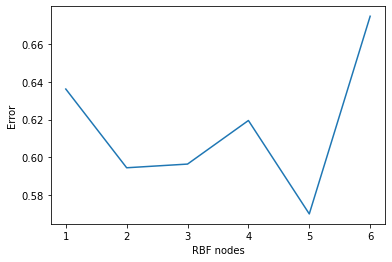

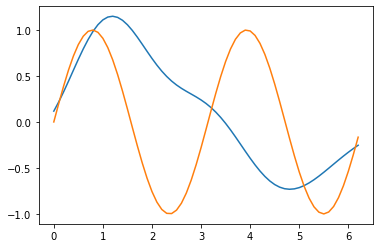

In [101]:
# 3.3 - CL to initialise RBF units

eta = .1
diff = []
n = len(x)
nRbfNodes = 7

# Noise-free functions
Y = np.sin(2*x)
#Y = np.add(ys,noise)

W_save = np.zeros((nRbfNodes-1,nRbfNodes-1))
approx_save = np.zeros((n,nRbfNodes))



for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    W = np.random.normal(0,1,j)
        
    mu = [i/j*2*np.pi for i in range(j)]
    mu = CL_algorithm(x,mu)
    
    sigma = 2*np.pi/nRbfNodes
    
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[idx,i] = gauss(xtest[idx],mu[i],sigma)
            
            
        error = Y[idx]-np.dot(phis,W)
        delta_w = np.dot(eta*error,phis)  
        W = delta_w+W
    W_save[j-1,:j] = W
        
    approx = np.mean(abs(np.dot(phis_test,W)-Y))
    approx_save[:,j] = np.dot(phis_test,W)
    diff.append(approx)



diff = np.array(diff)
plt.plot(range(1,nRbfNodes),diff)
plt.xlabel('RBF nodes')
plt.ylabel('Error')

plt.figure()
plt.plot(x,approx_save[:,5],x,Y)

[[0.279, 0.307, 0.974, 0.069, 0.29, 0.015, 0.686, 0.277, 0.743, 0.433, 0.251, 0.661, 0.096, 0.771, 0.992, 0.988, 0.007, 0.689, 0.228, 0.894, 0.276, 0.227, 0.542, 0.999, 0.53, 0.073, 0.244, 0.001, 0.012, 0.983, 0.815, 0.631, 0.629, 0.803, 0.062, 0.438, 0.909, 0.86, 0.461, 0.714, 0.61, 0.869, 0.366, 0.713, 0.765, 0.89, 0.216, 0.039, 0.343, 0.264, 0.815, 0.038, 0.483, 0.185, 0.972, 0.239, 0.53, 0.495, 0.979, 0.736, 0.205, 0.827, 0.867, 0.232, 0.605, 0.045, 0.126, 0.135, 0.92, 0.724, 0.956, 0.784, 0.288, 0.349, 0.899, 0.558, 0.482, 0.652, 0.095, 0.125, 0.576, 0.067, 0.286, 0.31, 0.85, 0.473, 0.705, 0.99, 0.594, 0.909, 0.27, 0.399, 0.847, 0.32, 0.445, 0.651, 0.917, 0.776, 0.844], [0.859, 0.403, 0.546, 0.903, 0.448, 0.085, 0.507, 0.434, 0.705, 0.752, 0.154, 0.62, 0.823, 0.403, 0.643, 0.763, 0.91, 0.805, 0.274, 0.753, 0.1, 0.482, 0.254, 0.673, 0.572, 0.257, 0.41, 0.718, 0.912, 0.251, 0.315, 0.261, 0.251, 0.466, 0.535, 0.25, 0.499, 0.452, 0.702, 0.668, 0.695, 0.467, 0.526, 0.967, 0.405, 0.472,

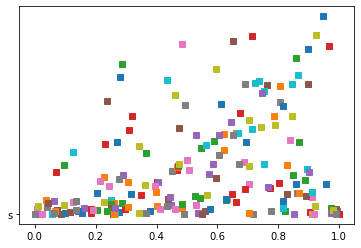

In [49]:
# Imported data


train = np.genfromtxt('data_lab2/ballist.dat', names = True, dtype = None)
test = np.genfromtxt('data_lab2/balltest.dat', names = True, dtype = None)

x_train1 = []
x_train2 = []
y_train1 = []
y_train2 = []

#print(train)
for i in range(len(train)):
    x_train1.append(train[i][0])
    x_train2.append(train[i][1])
    y_train1.append(train[i][2])
    y_train2.append(train[i][3])
    
x_train = [x_train1, x_train2]
y_train = [y_train1, y_train2]
print(x_train)
print(y_train)

plt.plot(x_train,y_train)

In [ ]:
# 3.3.3 - CL to initialise RBF units

eta = .1
diff = []
n = len(x)
nRbfNodes = 7

# Noise-free functions
Y = np.sin(2*x)
#Y = np.add(ys,noise)

W_save = np.zeros((nRbfNodes-1,nRbfNodes-1))
approx_save = np.zeros((n,nRbfNodes))



for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    W = np.random.normal(0,1,j)
        
    mu = [i/j*2*np.pi for i in range(j)]
    mu = CL_algorithm(x,mu)
    
    sigma = 2*np.pi/nRbfNodes
    
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[idx,i] = gauss(xtest[idx],mu[i],sigma)
            
            
        error = Y[idx]-np.dot(phis,W)
        delta_w = np.dot(eta*error,phis)  
        W = delta_w+W
    W_save[j-1,:j] = W
        
    approx = np.mean(abs(np.dot(phis_test,W)-Y))
    approx_save[:,j] = np.dot(phis_test,W)
    diff.append(approx)